# Part II - PISA 2012 data exploration
## by Tatjana Damdinshaw


## Investigation Overview

There is a strong relation between feeling anxious about math and scoring low in math or in total. The more students disagree with questions of the survey about math anxiety the better they scored in math. Female students feel more anxious about math than male students.
Surprisingly out-of-school learning hours do not have an influence on the math or total score. Some students score on a high level with high numbers of out-of-school learning hours but there are also students that learn a lot of hours outside of school but still do not score on a high level.
I will visualize the following key insights in this presentation: 
- Math anxiety per gender
- Influence of math anxiety in general on the math score
- Math anxiety survey question answers in relation to the math score for one selected question


## Dataset Overview

PISA is a survey that already took place the 5th time in 2012 to assess the competencies in reading, mathematics and science (focus on mathematics) of 15 year-old students in 65 countries and economies. This dataset contains the information for each student.
There are 485490 student PISA results with 636 features. Most of the features are answers to survey questions answered by the participating students and are ordered factor variables with Agree, Strongly agree, Disagree, Strongly disagree or a numeric scale. Numeric variables are the resulting score in the different categories.rief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012.csv', low_memory = False)

In [3]:
#Determine total score
total_pattern = re.compile(r'PV', re.IGNORECASE)
total_columns = df.filter(regex=total_pattern)
total_mean = total_columns.mean(axis = 1)

In [4]:
#Add total score to data frame
df['total_score'] = total_mean

In [5]:
#Determine math score
math_pattern = re.compile(r'PV\dMA', re.IGNORECASE)
math_columns = df.filter(regex=math_pattern)
math_mean = math_columns.mean(axis = 1)

In [6]:
#Add mean math score to data frame
df['math_score'] = math_mean

In [7]:
ordinal_var_dict = {'ST42Q01': ['Strongly agree','Agree','Disagree','Strongly disagree'], 
                   'ST42Q03': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   'ST42Q05': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   'ST42Q08': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                   'ST42Q10': ['Strongly agree','Agree','Disagree','Strongly disagree']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
categoric_vars = ['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10']


## Math anxiety per gender

The visualization shows that female students feel more anxious about math than male students. 

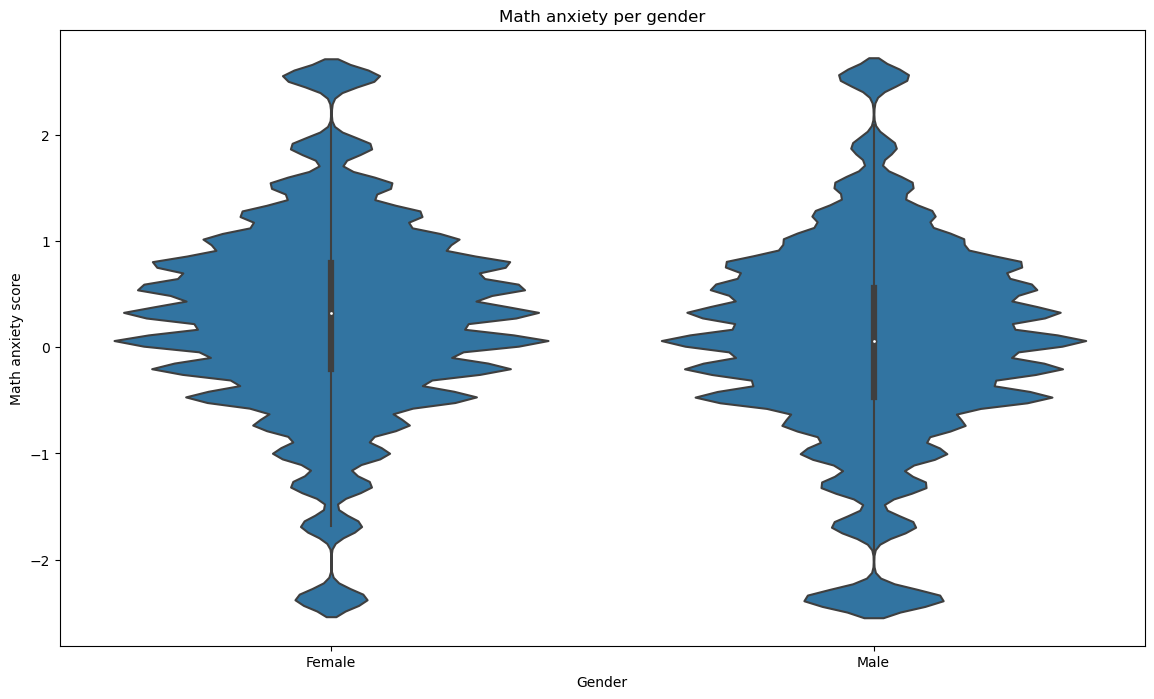

In [8]:
default_color = sb.color_palette()[0]

plt.figure(figsize=[14, 8])
sb.violinplot(data = df, x = 'ST04Q01', y = 'ANXMAT',color = default_color)
plt.ylabel('Math anxiety score')
plt.xlabel('Gender')
plt.title('Math anxiety per gender')

plt.show()

## Relation between math anxiety and math score

The following visualization series shows the strong relation between math anxiety and the math score. The more students disagree with questions the better they score in math.
- Worry That It Will Be Difficult
- Get Very Tense
- Get Very Nervous
- Feel Helpless
- Worry About Getting Poor Grades

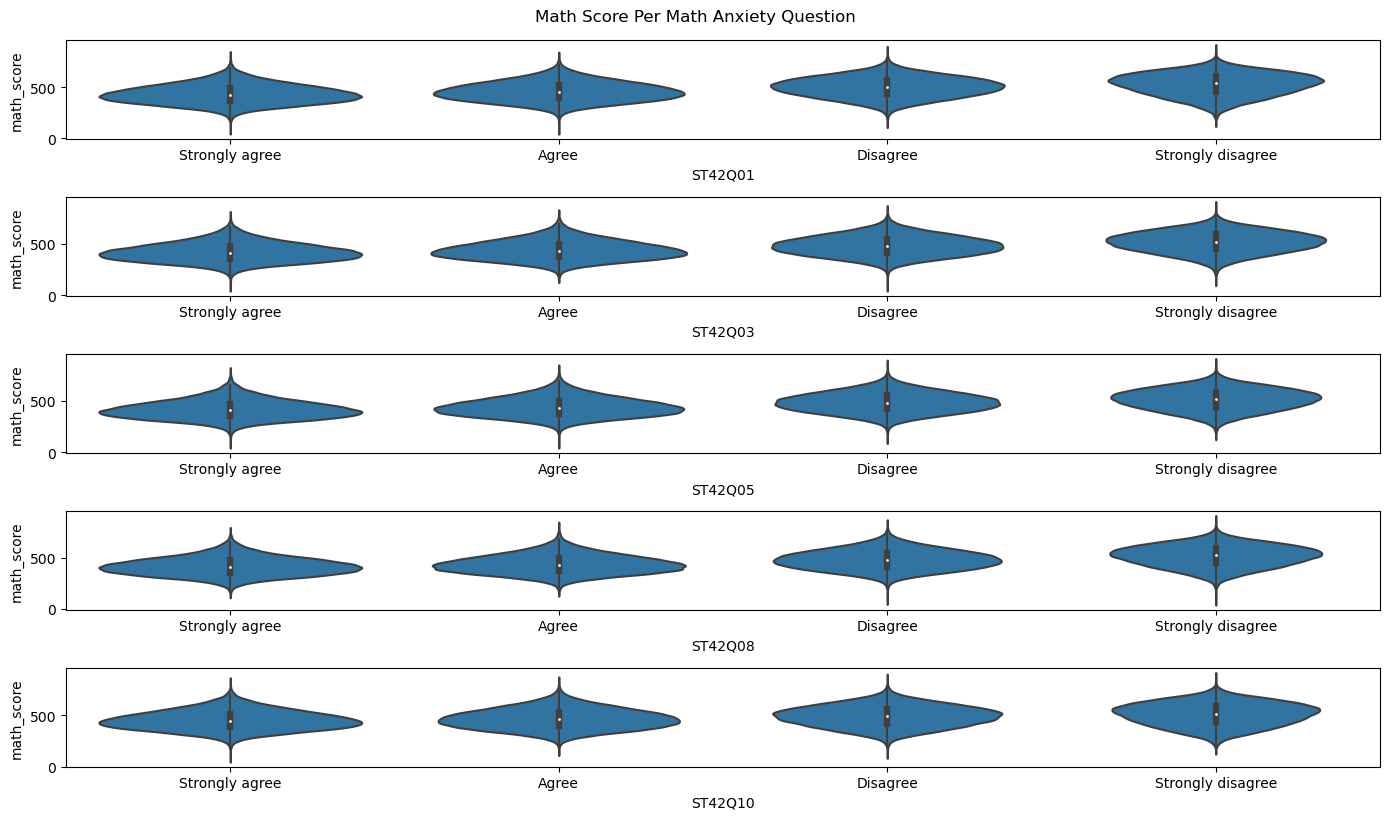

In [9]:
fig, ax = plt.subplots(nrows = 5, figsize = [14,8])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x = var, y = 'math_score', ax = ax[i],
               color = default_color)
    plt.tight_layout()

fig.suptitle('Math score per math anxiety question'.title(), y=1.02)
plt.show();

## Relation between math anxiety and math score per gender 
This visualization shows the answers to the question `Worry That It Will Be Difficult` in relation to the math score. In the visualization one can see the more students disagree with the survey question they score higher in math. There is also a difference between gender. Male students score higher than female students for each answer. The only exception is for `Strongly disagree` where female students have a higher math score than the male students. 

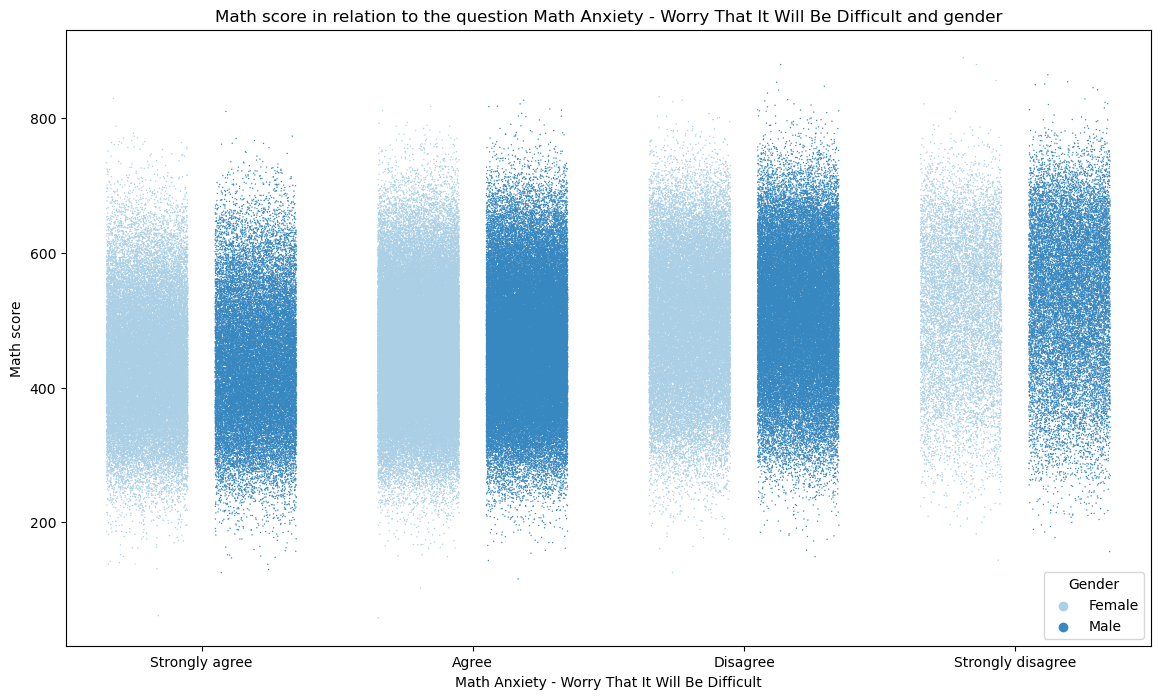

In [10]:
# Math score in relation to the question Math Anxiety - Worry That It Will Be Difficult and gender'
fig = plt.figure(figsize = [14,8])
ax = sb.stripplot(data = df, x = 'ST42Q01', y = 'math_score', hue = 'ST04Q01',
           palette = 'Blues', size = 1, jitter = 0.3, dodge = True)
plt.title('Math score in relation to the question Math Anxiety - Worry That It Will Be Difficult and gender')
plt.legend(title ='Gender')
plt.ylabel('Math score')
plt.xlabel('Math Anxiety - Worry That It Will Be Difficult')

plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_pisa_data_damdinshaw.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_pisa_data_damdinshaw.ipynb to slides
[NbConvertApp] Writing 1581694 bytes to Part_II_slide_deck_pisa_data_damdinshaw.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_pisa_data_damdinshaw.slides.html
Use Control-C to stop this server
